# Plotting data on lithosphere-asthenosphere boundary maps and perform quantitative analysis on geodesic distances to pre-defined lihospheric depth

In [2]:
from src.dependencies import *
from src.functions import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Specify a lithospheric thickness of interest in km

z = 170

In [5]:
# import data
## Lithosphere-asthenosphere boundary (LAB) data in netCDF file type
## Deposit data in ASCII file type

# Get current working directory
cwd = os.getcwd() 

cwd_sl13 = cwd+"/src/data/SL2013sv.nc"
cwd_l1 = cwd+"/src/data/LAB_litho1.0.grd"
cwd_a06 = cwd+"/src/data/A2006_lithosphere.grd"
cwd_af = cwd+"/src/data/afonso_2019_LAB_0.25d.grd"

# Lithosphere-asthenosphere boundary (LAB) maps
sl13 = netCDF4.Dataset(cwd_sl13, 'r') 
a06 = netCDF4.Dataset(cwd_a06, 'r')
litho = netCDF4.Dataset(cwd_l1, 'r')
afonso = netCDF4.Dataset(cwd_af, 'r')

# Global locations of magmatic nickel deposits
mni = pd.read_csv(cwd+"/src/data/mag_Ni_karol_181117.csv")

In [6]:
# Sort deposit data into array of arrays

size_mni = (len(mni), 4)
data_mni = np.empty(size_mni)

data_mni[..., 0] = mni['Longitude']
data_mni[..., 1] = mni['Latitude']
data_mni[..., 2] = mni['Age_Ga']

In [7]:
# Generate 100 CDFs of random locations

random.seed(999)

random_mni = random_points(data_mni, 100)

onshore_mni = random_mni[1]
offshore_mni = random_mni[2]
random_mni = random_mni[0]

In [8]:
fig = pygmt.Figure()

# Extract coordinates of contour line where lithospheric thickness is z, then dump coordinates as an ASCII file

fig.grdcontour(grid=cwd_sl13, interval = str(z) + ',', D = "contoursl13.ll") # ',' denotes a single contour rather than interval steps
contoursl = pd.read_csv("contoursl13.ll", delimiter = '\t')

fig.grdcontour(grid=cwd_a06, interval = str(z) + ',', D = "contoura06.ll")
contoura06 = pd.read_csv("contoura06.ll", delimiter = '\t')

fig.grdcontour(grid=cwd_l1, interval = str(z) + ',', D = "contourl1.ll")
contourl1 = pd.read_csv("contourl1.ll", delimiter = '\t')

fig.grdcontour(grid=cwd_af, interval = str(z) + ',', D = "contouraf.ll")
contouraf = pd.read_csv("contouraf.ll", delimiter = '\t')


# Write deposit longitude and latitude into ASCII file

mni.to_csv('deposit.ll', sep = '\t', index = False)
mni.iloc[:, [2, 3]].to_csv('deposit.ll', sep = '\t', index = False)


# Write longitude and latitude of random locations into ASCII file

pd.DataFrame(onshore_mni).to_csv('random.ll', index = False, header = ['lon', 'lat'])

In [9]:
# Calculate closest approach for each data location to contour and store to CSV.
## Opens a shell and performs 'mapproject' function, saves output into a temporary file and reads it.

with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        
        # -L determines the closest distances between input points and line ASCII
        session.call_module("mapproject", f"deposit.ll -Lcontoursl13.ll+uk ->{tmpfile.name}") 
        closest_distance = tmpfile.read().strip()

data_depositsl13 = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_depositsl13 = pd.DataFrame({"lon deposit":data_depositsl13[0], "lat deposit":data_depositsl13[1], 
                                 "distance":data_depositsl13[2], "lon contour":data_depositsl13[3], 
                                 "lat contour":data_depositsl13[4]})



with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"deposit.ll -Lcontoura06.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_deposita06 = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_deposita06 = pd.DataFrame({"lon deposit":data_deposita06[0], "lat deposit":data_deposita06[1], 
                                "distance":data_deposita06[2], "lon contour":data_deposita06[3], 
                                "lat contour":data_deposita06[4]})



with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"deposit.ll -Lcontourl1.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_depositl1 = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_depositl1 = pd.DataFrame({"lon deposit":data_depositl1[0], "lat deposit":data_depositl1[1], 
                               "distance":data_depositl1[2], "lon contour":data_depositl1[3], 
                               "lat contour":data_depositl1[4]})



with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"deposit.ll -Lcontouraf.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_depositaf = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_depositaf = pd.DataFrame({"lon deposit":data_depositaf[0], "lat deposit":data_depositaf[1], 
                               "distance":data_depositaf[2], "lon contour":data_depositaf[3], 
                               "lat contour":data_depositaf[4]})

In [10]:
# Calculate closest approach for each random location to contour and store to CSV.

with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"random.ll -Lcontoursl13.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_randomsl13 = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_randomsl13 = pd.DataFrame({"lon deposit":data_randomsl13[0], "lat deposit":data_randomsl13[1], 
                                "distance":data_randomsl13[2], "lon contour":data_randomsl13[3], 
                                "lat contour":data_randomsl13[4]})



with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"random.ll -Lcontoura06.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_randoma06 = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_randoma06 = pd.DataFrame({"lon deposit":data_randoma06[0], "lat deposit":data_randoma06[1], 
                               "distance":data_randoma06[2], "lon contour":data_randoma06[3], 
                               "lat contour":data_randoma06[4]})


with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"random.ll -Lcontourl1.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_randoml1 = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_randoml1 = pd.DataFrame({"lon deposit":data_randoml1[0], "lat deposit":data_randoml1[1], "distance":data_randoml1[2], 
                              "lon contour":data_randoml1[3], "lat contour":data_randoml1[4]})


with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"random.ll -Lcontouraf.ll+uk ->{tmpfile.name}")
        closest_distance = tmpfile.read().strip()

data_randomaf = pd.read_csv(io.StringIO(closest_distance), sep=" ", header = None)
data_randomaf = pd.DataFrame({"lon deposit":data_randomaf[0], "lat deposit":data_randomaf[1], "distance":data_randomaf[2], 
                              "lon contour":data_randomaf[3], "lat contour":data_randomaf[4]})

In [11]:
# Generate CDFs for data and random locations for every LAB map

cdf_depositsl13 = get_cdf(data_depositsl13['distance'], 10)
cdf_randomsl13 = get_cdf(data_randomsl13['distance'], 10)

cdf_deposita06 = get_cdf(data_deposita06['distance'], 10)
cdf_randoma06 = get_cdf(data_randoma06['distance'], 10)

cdf_depositl1 = get_cdf(data_depositl1['distance'], 10)
cdf_randoml1 = get_cdf(data_randoml1['distance'], 10)

cdf_depositaf = get_cdf(data_depositaf['distance'], 10)
cdf_randomaf = get_cdf(data_randomaf['distance'], 10)

In [12]:
# Get standard deviations for random locations

std_sl13 = get_std(data_randomsl13['distance'], 10)
std_a06 = get_std(data_randoma06['distance'], 10)
std_l1 = get_std(data_randoml1['distance'], 10)
std_af = get_std(data_randomaf['distance'], 10)

In [13]:
# Calculate D and p-values for each LAB map.  

dsl13 = ks2(data_depositsl13['distance'], data_randomsl13['distance'], 100)[0]
psl13 = ks2(data_depositsl13['distance'], data_randomsl13['distance'], 100)[1]

da06 = ks2(data_deposita06['distance'], data_randoma06['distance'], 100)[0]
pa06 = ks2(data_deposita06['distance'], data_randoma06['distance'], 100)[1]

dl1 = ks2(data_depositl1['distance'], data_randoml1['distance'], 100)[0]
pl1 = ks2(data_depositl1['distance'], data_randoml1['distance'], 100)[1]

daf = ks2(data_depositaf['distance'], data_randomaf['distance'], 100)[0]
paf = ks2(data_depositaf['distance'], data_randomaf['distance'], 100)[1]

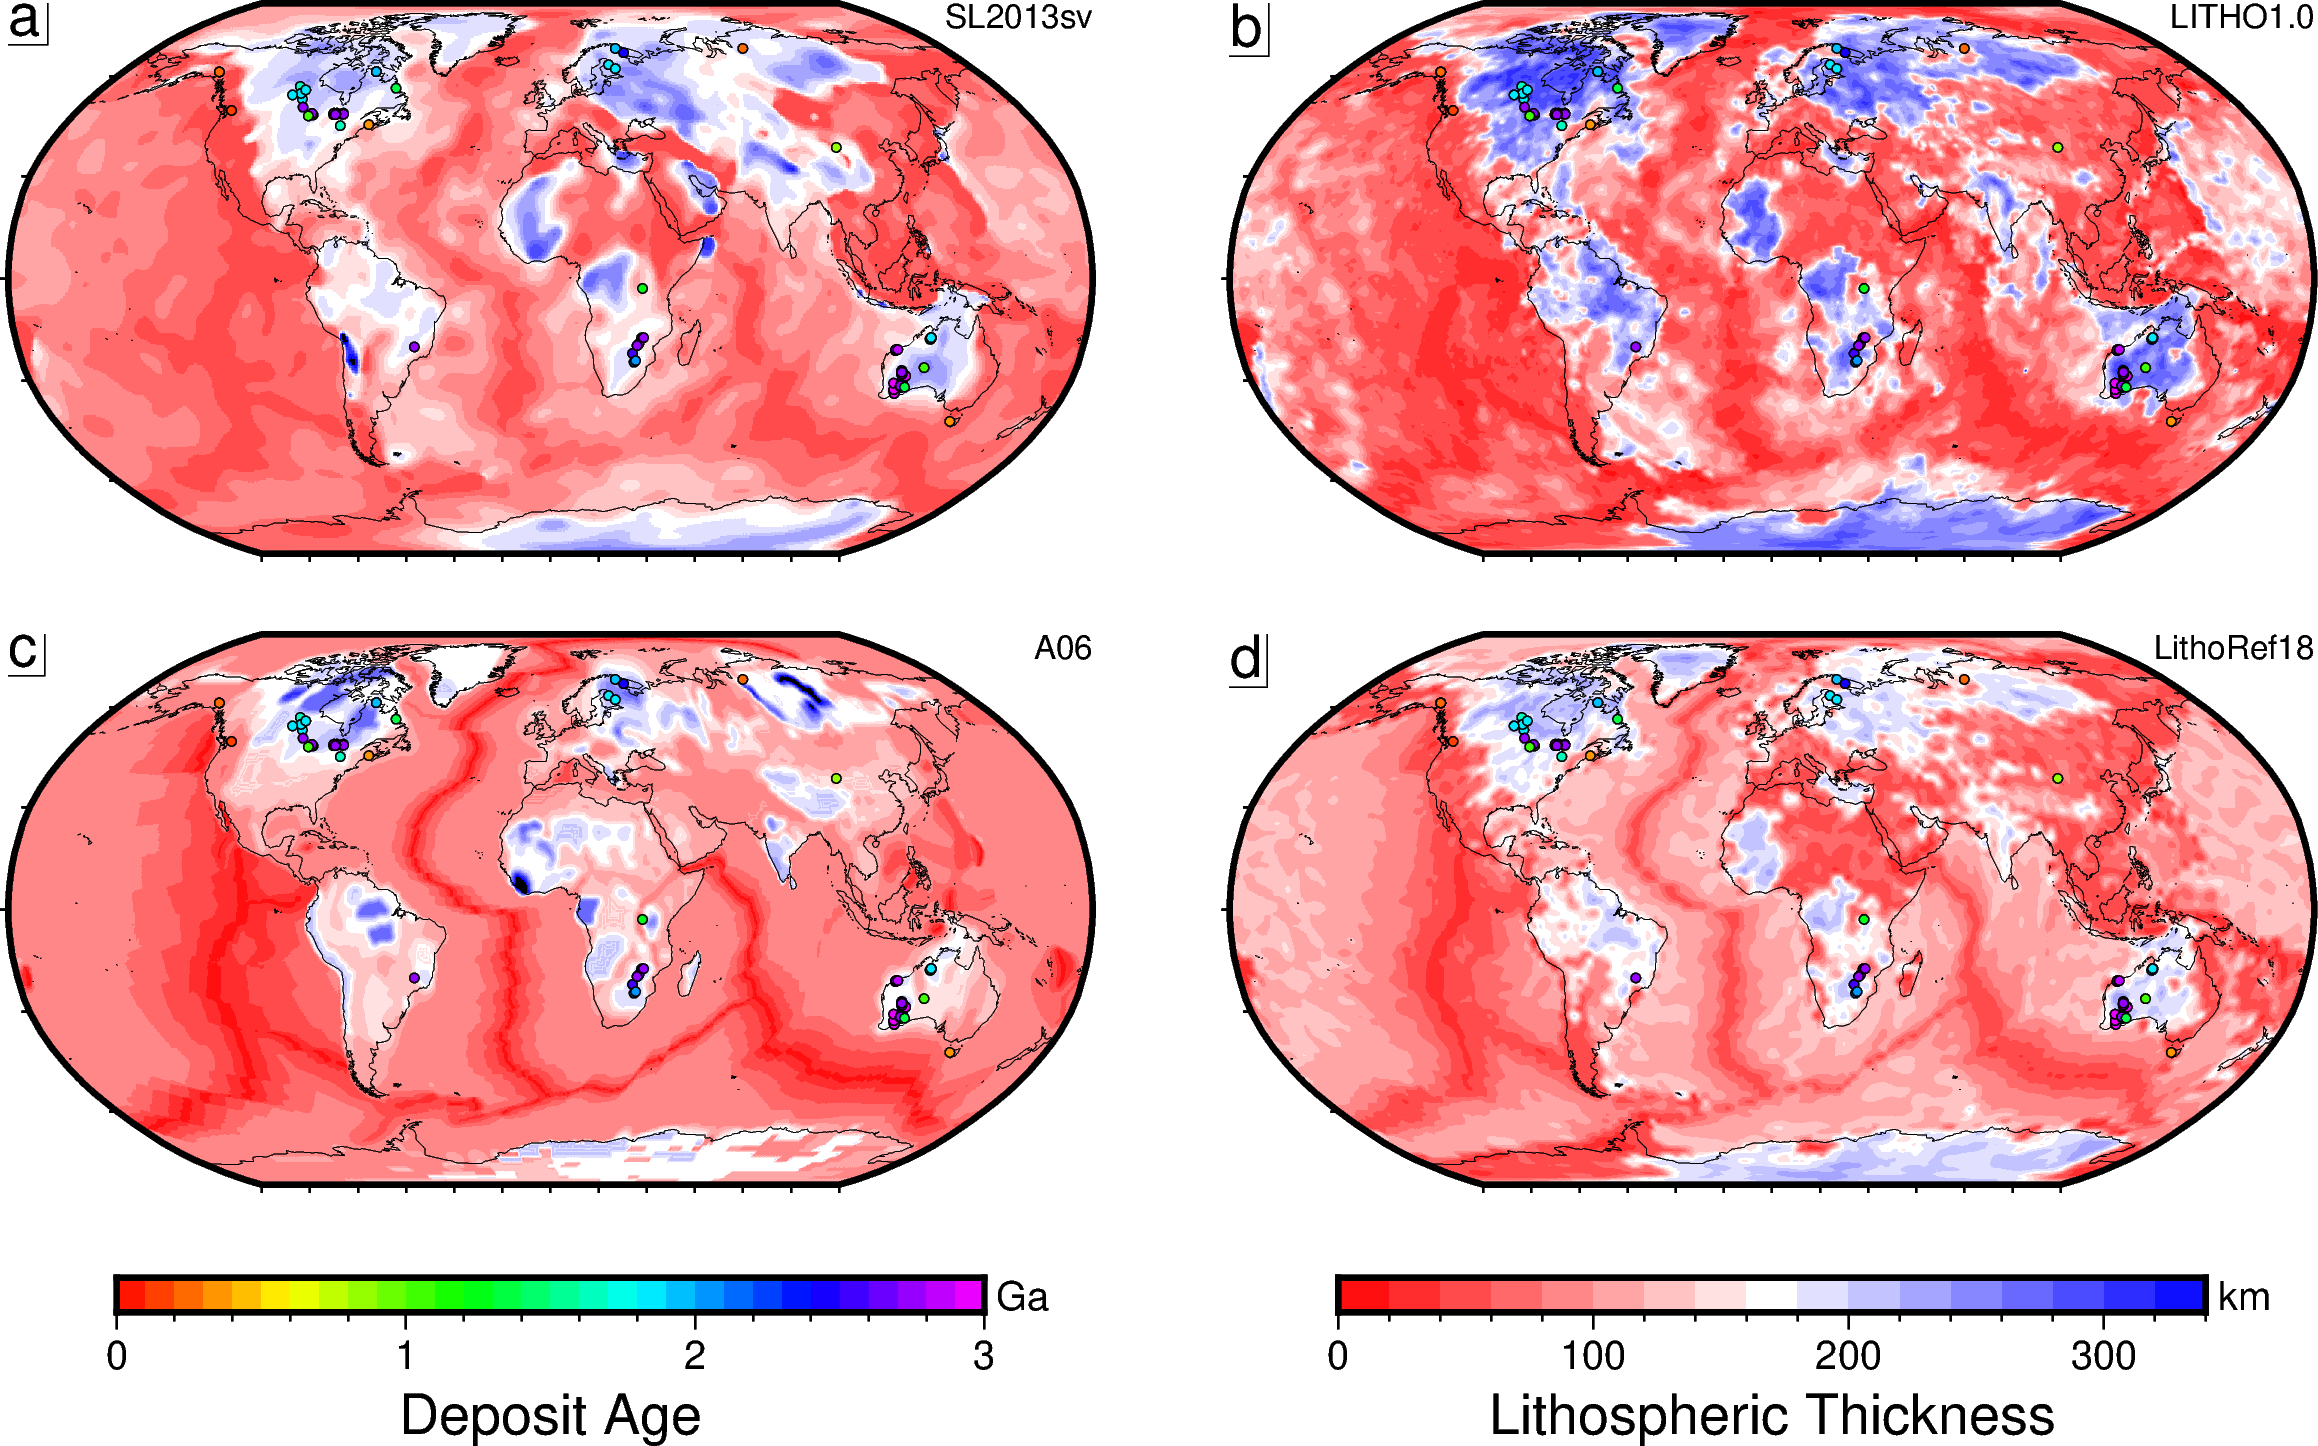

In [14]:
# Deposit data on various LAB maps

fig = pygmt.Figure()
cmap_series_lab = (0, 350, 20)
cmap_series_data = (round(min(data_mni[..., 2])), round(max(data_mni[..., 2])), 0.1)

with fig.subplot(nrows=2, ncols=2, figsize=("20c", "10c"), margins="0.1c"):

    with fig.set_panel(panel=0):
        pygmt.makecpt(cmap="polar", series=cmap_series_lab, reverse = True)
        fig.grdimage(grid=cwd_sl13, projection="N?", frame='f', region = 'd')
        fig.coast(shorelines = "1/0.01,black")
        pygmt.makecpt(cmap="rainbow", series=cmap_series_data, reverse = True)
        fig.plot(x=data_mni[..., 0], 
                 y=data_mni[..., 1], 
                 color=data_mni[..., 2],
                 cmap = True,
                 style="c0.08c",
                 pen="black")
        fig.text(position = "TL", text = "a", font = "14p", pen = "black")
        fig.text(position="TR", text="SL2013sv", font = "8p")
         
    with fig.set_panel(panel=1):
        pygmt.makecpt(cmap="polar", series=cmap_series_lab, reverse = True)
        fig.grdimage(grid=cwd_l1, projection="N?", frame='f', region = 'd')
        fig.coast(shorelines = "1/0.01,black")
        pygmt.makecpt(cmap="rainbow", series=cmap_series_data, reverse = True)
        fig.plot(x=data_mni[..., 0], 
                 y=data_mni[..., 1], 
                 color=data_mni[..., 2],
                 cmap = True,
                 style="c0.08c",
                 pen="black")
        fig.text(position = "TL", text = "b", font = "14p", pen = "black")
        fig.text(position="TR", text="LITHO1.0", font = "8p")
        
    with fig.set_panel(panel=2):
        pygmt.makecpt(cmap="polar", series=cmap_series_lab, reverse = True)
        fig.grdimage(grid=cwd_a06, projection="N?", frame='f', region = 'd')
        fig.coast(shorelines = "1/0.01,black")
        pygmt.makecpt(cmap="rainbow", series=cmap_series_data, reverse = True)
        fig.plot(x=data_mni[..., 0], 
                 y=data_mni[..., 1], 
                 color=data_mni[..., 2],
                 cmap = True,
                 style="c0.08c",
                 pen="black")
        fig.text(position = "TL", text = "c", font = "14p", pen = "black")
        fig.text(position="TR", text="A06", font = "8p")
        fig.colorbar(frame=["x+lDeposit Age", "y+lGa"])
        
    with fig.set_panel(panel=3):
        pygmt.makecpt(cmap="polar", series=cmap_series_lab, reverse = True)
        fig.grdimage(grid=cwd_af, projection="N?", frame='f', region = 'd')
        fig.colorbar(frame=["x+lLithospheric Thickness", "y+lkm"])
        fig.coast(shorelines = "1/0.01,black")
        pygmt.makecpt(cmap="rainbow", series=cmap_series_data, reverse = True)
        fig.plot(x=data_mni[..., 0], 
                 y=data_mni[..., 1], 
                 color=data_mni[..., 2],
                 cmap = True,
                 style="c0.08c",
                 pen="black")
        fig.text(position = "TL", text = "d", font = "14p", pen = "black")
        fig.text(position="TR", text="LithoRef18", font = "8p")
        
fig.show()
fig.savefig('LAB_maps.jpg') # Save as JPEG

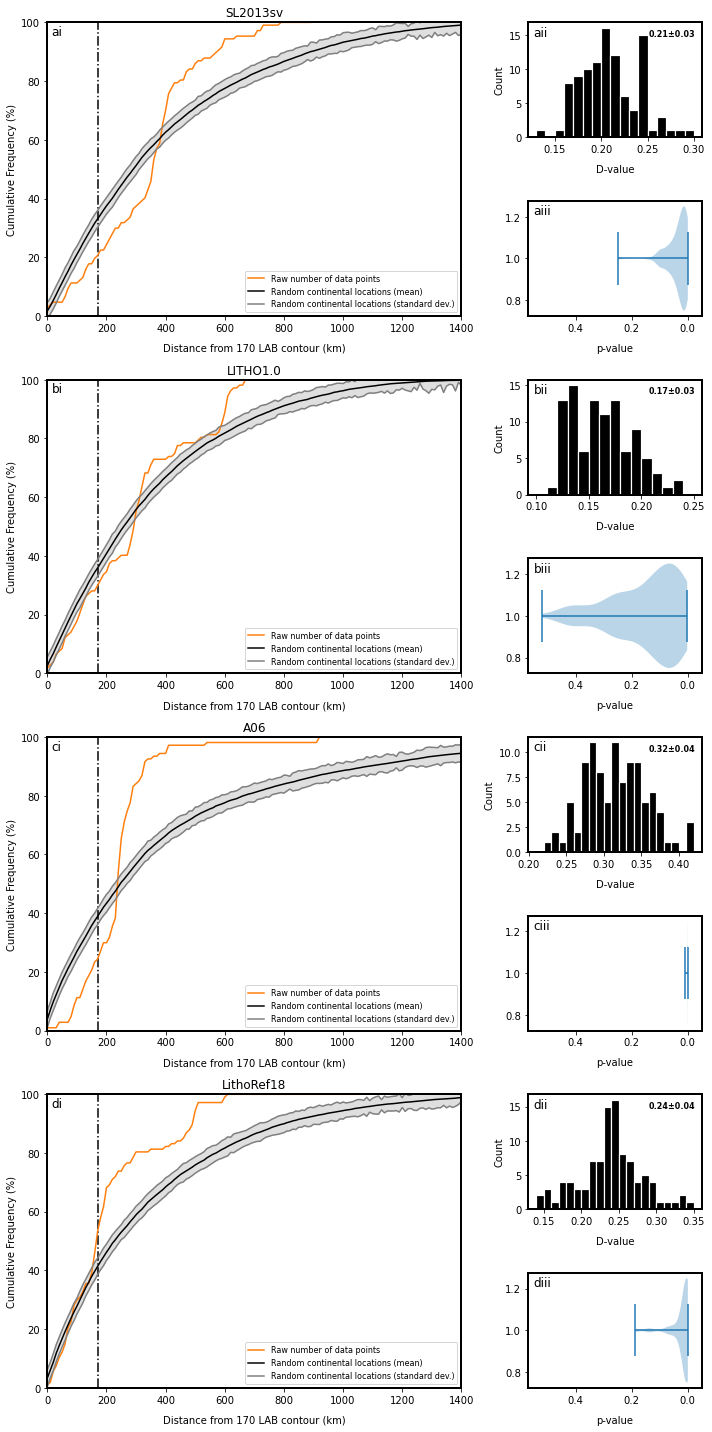

In [15]:
# For each LAB map, produce:
# 1. Cumulative frequency graph for data and random locations' distances from contour z
# 2. Histogram of D-values 
# 3. Violin plot of p-values

matplotlib.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize = [10, 20])

ax1 = plt.subplot2grid((8, 3), (0, 0), rowspan = 2, colspan = 2)
plot_cdf(cdf_depositsl13, cdf_randomsl13, std_sl13, ax = ax1, title = "SL2013sv", z = z)
ax1.annotate("ai", xy=(0.01, 0.99), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax2 = fig.add_subplot(833)
plot_hist_d(dsl13, ax2)
# ax2.set_xlim(0, max(np.concatenate([dsl13, dl1, da06, daf])))
ax2.annotate("aii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax3 = fig.add_subplot(836)
plot_violin_p(psl13, ax3)
ax3.set_xlim(max(np.concatenate([psl13, pl1, pa06, paf])) + 0.05, -0.05)
ax3.annotate("aiii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax4 = plt.subplot2grid((8, 3), (2, 0), rowspan = 2, colspan = 2)
plot_cdf(cdf_depositl1, cdf_randoml1, std_l1, ax = ax4, title = "LITHO1.0", z = z)
ax4.annotate("bi", xy=(0.01, 0.99), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax5 = fig.add_subplot(839)
plot_hist_d(dl1, ax5)
# ax5.set_xlim(0, max(np.concatenate([dsl13, dl1, da06, daf])))
ax5.annotate("bii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax6 = fig.add_subplot(8, 3, 12)
plot_violin_p(pl1, ax6)
ax6.set_xlim(max(np.concatenate([psl13, pl1, pa06, paf])) + 0.05, -0.05)
ax6.annotate("biii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax7 = plt.subplot2grid((8, 3), (4, 0), rowspan = 2, colspan = 2)
plot_cdf(cdf_deposita06, cdf_randoma06, std_a06, ax = ax7, title = "A06", z = z)
ax7.annotate("ci", xy=(0.01, 0.99), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax8 = fig.add_subplot(8, 3, 15)
plot_hist_d(da06, ax8)
# ax8.set_xlim(0, max(np.concatenate([dsl13, dl1, da06, daf])))
ax8.annotate("cii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax9 = fig.add_subplot(8, 3, 18)
plot_violin_p(pa06, ax9)
ax9.set_xlim(max(np.concatenate([psl13, pl1, pa06, paf])) + 0.05, -0.05)
ax9.annotate("ciii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax10 = plt.subplot2grid((8, 3), (6, 0), rowspan = 2, colspan = 2)
plot_cdf(cdf_depositaf, cdf_randomaf, std_af, ax = ax10, title = "LithoRef18", z = z)
ax10.annotate("di", xy=(0.01, 0.99), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax11 = fig.add_subplot(8, 3, 21)
plot_hist_d(daf, ax11)
# ax11.set_xlim(0, max(np.concatenate([dsl13, dl1, da06, daf])))
ax11.annotate("dii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

ax12 = fig.add_subplot(8, 3, 24)
plot_violin_p(paf, ax12)
ax12.set_xlim(max(np.concatenate([psl13, pl1, pa06, paf])) + 0.05, -0.05)
ax12.annotate("diii", xy=(0.03, 0.97), fontsize = 12, xycoords='axes fraction', ha='left', va='top')

fig.tight_layout()
fig.savefig('CDFs.jpg') # Save as JPEG